**Import libraries**

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import plotly.express as px

%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

# **Data Preproccesing (Explore the data)**

### Data Understanding

In [ ]:
# Collecting data
df = pd.read_csv('Cars_Dataset.csv')

In [ ]:
# Showing the first 5 rows of the data
df.head()

,Car,Car Name,Image,Manufacturer,Model Year,Serial Number,Date Auctioned,Auction House,Locale,Original Price,Adjusted Price,Wikipedia Profile,Description
0,4½-Litre Supercharged 'Blower' Bentley Single-...,4½-Litre Supercharged 'Blower' Bentley Single-...,http://blog.hemmings.com/wp-content/uploads//2...,Bentley,1929,HB 3402,29/06/2012,Bonhams,"Goodwood, Sussex, United Kingdom","$7,906,745","$8,122,206",http://en.wikipedia.org/wiki/Bentley_Blower_o.1,Bentley Blower o.1 is a racing car developed f...
1,Alfa Romeo 6C 1750 Supercharged Gran Sport Spi...,Alfa Romeo 6C 1750 Supercharged Gran Sport Spider,http://images2.bonhams.com/image?src=Images/li...,Alfa Romeo,1931,10814356,17/01/2014,Bonhams,"Scottsdale, Arizona, United States","$3,080,000","$3,080,000",http://en.wikipedia.org/wiki/Alfa_Romeo_6C,"The Alfa Romeo 6C name was used on road, race,..."
2,Alfa Romeo 6C 2500 Competizione 1948 920.002,Alfa Romeo 6C 2500 Competizione,http://files.conceptcarz.com/img/Alfa%20Romeo/...,Alfa Romeo,1948,920.002,17/08/2013,Gooding & Company,"Pebble Beach, California, United States","$4,840,000","$4,900,154",http://en.wikipedia.org/wiki/Alfa_Romeo_6C,"The Alfa Romeo 6C name was used on road, race,..."
3,Alfa Romeo 8C 2300 'Le Mans' Tourer 1934 2311221,Alfa Romeo 8C 2300 'Le Mans' Tourer,http://images1.bonhams.com/image?src=Images/li...,Alfa Romeo,1934,2311221,12/07/2013,Bonhams,"Goodwood, West Sussex, United Kingdom","$3,135,659","$3,174,631",http://en.wikipedia.org/wiki/Alfa_Romeo_8C,"The Alfa Romeo 8C name was used on road, race ..."
4,Alfa Romeo 8C 2300 Castagna Drop Head Coupe 19...,Alfa Romeo 8C 2300 Castagna Drop Head Coupe,http://www.coachbuild.com/gallery/d/40381-2/Ca...,Alfa Romeo,1933,2311214,16/08/2009,Gooding & Company,"Pebble Beach, California, United States","$4,180,000","$4,594,953",http://en.wikipedia.org/wiki/Alfa_Romeo_8C,"The Alfa Romeo 8C name was used on road, race ..."


**Check Data Condition**

In [ ]:
# Check the shape of the dataframe
# this means our dataframe has 169 rows and 13 columns
df.shape

(169, 13)

In [ ]:
# Check all columns in the dataset
df.columns

Index(['Car', 'Car Name', 'Image', 'Manufacturer', 'Model Year',
       'Serial Number', 'Date Auctioned', 'Auction House', 'Locale',
       'Original Price', 'Adjusted Price', 'Wikipedia Profile', 'Description'],
      dtype='object')

In [ ]:
# Check data types of each variables and count how many entries in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car                169 non-null    object
 1   Car Name           169 non-null    object
 2   Image              169 non-null    object
 3   Manufacturer       168 non-null    object
 4   Model Year         169 non-null    int64 
 5   Serial Number      167 non-null    object
 6   Date Auctioned     169 non-null    object
 7   Auction House      169 non-null    object
 8   Locale             169 non-null    object
 9   Original Price     169 non-null    object
 10  Adjusted Price     169 non-null    object
 11  Wikipedia Profile  169 non-null    object
 12  Description        169 non-null    object
dtypes: int64(1), object(12)
memory usage: 17.3+ KB


Original Price and Adjusted Price data types cannot be string but should be integer

**Check Missing Values**

In [ ]:
# Checking how many missing values found in each variable
df.isna().sum()

,0
Car,0
Car Name,0
Image,0
Manufacturer,1
Model Year,0
Serial Number,2
Date Auctioned,0
Auction House,0
Locale,0
Original Price,0


There are missing value in Manufacturer and Serial Number

**Drop variable that we don't need for modelling based on prior knowledge**




In [ ]:
# Using df.drop to drop irrelevant variables and variables that contains unique values
df = df.drop(['Car', 'Car Name', 'Image', 'Serial Number', 'Wikipedia Profile', 'Description'], axis=1)
df.head()

,Manufacturer,Model Year,Date Auctioned,Auction House,Locale,Original Price,Adjusted Price
0,Bentley,1929,29/06/2012,Bonhams,"Goodwood, Sussex, United Kingdom","$7,906,745","$8,122,206"
1,Alfa Romeo,1931,17/01/2014,Bonhams,"Scottsdale, Arizona, United States","$3,080,000","$3,080,000"
2,Alfa Romeo,1948,17/08/2013,Gooding & Company,"Pebble Beach, California, United States","$4,840,000","$4,900,154"
3,Alfa Romeo,1934,12/07/2013,Bonhams,"Goodwood, West Sussex, United Kingdom","$3,135,659","$3,174,631"
4,Alfa Romeo,1933,16/08/2009,Gooding & Company,"Pebble Beach, California, United States","$4,180,000","$4,594,953"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Manufacturer    168 non-null    object
 1   Model Year      169 non-null    int64 
 2   Date Auctioned  169 non-null    object
 3   Auction House   169 non-null    object
 4   Locale          169 non-null    object
 5   Original Price  169 non-null    object
 6   Adjusted Price  169 non-null    object
dtypes: int64(1), object(6)
memory usage: 9.4+ KB


###Feature Extraction

Changing non standard data into standard type data

In [ ]:
# First we remove the '$' and ',' symbol by using x.replace function
# and then we convert the object to integer

# Change 'Original Price' data type from object to integer
df['Original Price'] = df['Original Price'].apply(lambda x: int(x.replace('$', '').replace(',', '')))

# Change 'Adjusted Price' data type from object to integer
df['Adjusted Price'] = df['Adjusted Price'].apply(lambda x: int(x.replace('$', '').replace(',', '')))

# Show dataframe
df.head()

,Manufacturer,Model Year,Date Auctioned,Auction House,Locale,Original Price,Adjusted Price
0,Bentley,1929,29/06/2012,Bonhams,"Goodwood, Sussex, United Kingdom",7906745,8122206
1,Alfa Romeo,1931,17/01/2014,Bonhams,"Scottsdale, Arizona, United States",3080000,3080000
2,Alfa Romeo,1948,17/08/2013,Gooding & Company,"Pebble Beach, California, United States",4840000,4900154
3,Alfa Romeo,1934,12/07/2013,Bonhams,"Goodwood, West Sussex, United Kingdom",3135659,3174631
4,Alfa Romeo,1933,16/08/2009,Gooding & Company,"Pebble Beach, California, United States",4180000,4594953


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Manufacturer    168 non-null    object
 1   Model Year      169 non-null    int64 
 2   Date Auctioned  169 non-null    object
 3   Auction House   169 non-null    object
 4   Locale          169 non-null    object
 5   Original Price  169 non-null    int64 
 6   Adjusted Price  169 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 9.4+ KB


The Original Price and Adjusted Price data type is now integer

In [ ]:
# Convert 'Date Auctioned' data type from string to datetime and extract only
# the year and then make a new variable called 'Car Age' to calculate the
# Car Age by subtractingYear Auctioned and Model Year

# Convert Date Auctioned to datetime using pd.to_datetime
df['Date Auctioned'] = pd.to_datetime(df['Date Auctioned'], format='%d/%m/%Y')

# Year extraction
df['Year Auctioned'] = df['Date Auctioned'].dt.year

# Subtracting Year Auctioned and Model Year to get Car Age
df['Car Age'] = abs(df['Year Auctioned'] - df['Model Year'])

# Since we have extracted Date Auctioned and Model Year into Car Age
# we will drop Date Auctioned and Model Year
df = df.drop(['Date Auctioned', 'Model Year', 'Year Auctioned'], axis = 1)

# Show dataframe
df.head()

,Manufacturer,Auction House,Locale,Original Price,Adjusted Price,Car Age
0,Bentley,Bonhams,"Goodwood, Sussex, United Kingdom",7906745,8122206,83
1,Alfa Romeo,Bonhams,"Scottsdale, Arizona, United States",3080000,3080000,83
2,Alfa Romeo,Gooding & Company,"Pebble Beach, California, United States",4840000,4900154,65
3,Alfa Romeo,Bonhams,"Goodwood, West Sussex, United Kingdom",3135659,3174631,79
4,Alfa Romeo,Gooding & Company,"Pebble Beach, California, United States",4180000,4594953,76


Now a new variable Car Age is visible in our dataframe and is integer

In [ ]:
# Extract only the country from Locale column
df['Country'] = df['Locale'].apply(lambda x: x.split(', ')[-1])

# After the extraction, drop Locale
df = df.drop(['Locale'], axis = 1)

# Show dataframe
df.head()

,Manufacturer,Auction House,Original Price,Adjusted Price,Car Age,Country
0,Bentley,Bonhams,7906745,8122206,83,United Kingdom
1,Alfa Romeo,Bonhams,3080000,3080000,83,United States
2,Alfa Romeo,Gooding & Company,4840000,4900154,65,United States
3,Alfa Romeo,Bonhams,3135659,3174631,79,United Kingdom
4,Alfa Romeo,Gooding & Company,4180000,4594953,76,United States


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Manufacturer    168 non-null    object
 1   Auction House   169 non-null    object
 2   Original Price  169 non-null    int64 
 3   Adjusted Price  169 non-null    int64 
 4   Car Age         169 non-null    int64 
 5   Country         169 non-null    object
dtypes: int64(3), object(3)
memory usage: 8.0+ KB


Now we have 6 columns left that we will use for visualization and modelling

### Understanding each variables

**Categorical Variables**

In [ ]:
print("Unique datas in Manufacturer :", df['Manufacturer'].nunique(), "\n")
df['Manufacturer'].value_counts()

Unique datas in Manufacturer : 23 



,count
Manufacturer,
Ferrari,81
Mercedes-Benz,12
Porsche,7
Bugatti,7
Jaguar,7
Alfa Romeo,7
Bentley,6
McLaren,5
Talbot-Lago,5


In [ ]:
print("Unique datas in Auction House :", df['Auction House'].nunique(), "\n")
df['Auction House'].value_counts()

Unique datas in Auction House : 13 



,count
Auction House,
RM Auctions,64
Gooding & Company,34
Bonhams,21
Goodings & Company,15
"RM Auctions, Sotheby's",14
Barrett-Jackson,6
Christie's,4
Mecum,3
Goodings & Co.,3


There are mispells found in Auction House names like

Goodings & Company -> Gooding & Company

 RM Auctions, Sotheby's -> RM Sotheby's

Mecum -> Mecum Auctions

In [ ]:
df.replace({'Auction House' : {'Goodings & Company': 'Gooding & Company',
                              'Goodings & Co.': 'Gooding & Company'}}, inplace = True)

df.replace({'Auction House' : {'RM Auctions': 'RM Sotheby\'s',
                              'RM Auctions, Sotheby\'s': 'RM Sotheby\'s',
                              'Sotheby\'s' : 'RM Sotheby\'s'}}, inplace = True)

df.replace({'Auction House' : {'Mecum' : 'Mecum Auctions'}}, inplace = True)

df['Auction House'].value_counts()

,count
Auction House,
RM Sotheby's,79
Gooding & Company,52
Bonhams,21
Barrett-Jackson,6
Christie's,4
Mecum Auctions,4
Artcurial,2
Kruse International,1


In [ ]:
print("Unique datas in Country :", df['Country'].nunique(), "\n")
df['Country'].value_counts()

Unique datas in Country : 6 



,count
Country,
United States,124
United Kingdom,14
Italy,14
France,8
Monaco,8
Florida,1


Florida is not a country, but a state inside United States, so we will replace Florida with United States

In [ ]:
df.replace({'Country': 'Florida'}, 'United States', inplace=True)
df['Country'].value_counts()

,count
Country,
United States,125
United Kingdom,14
Italy,14
France,8
Monaco,8


**Visualization for Categorical Columns**

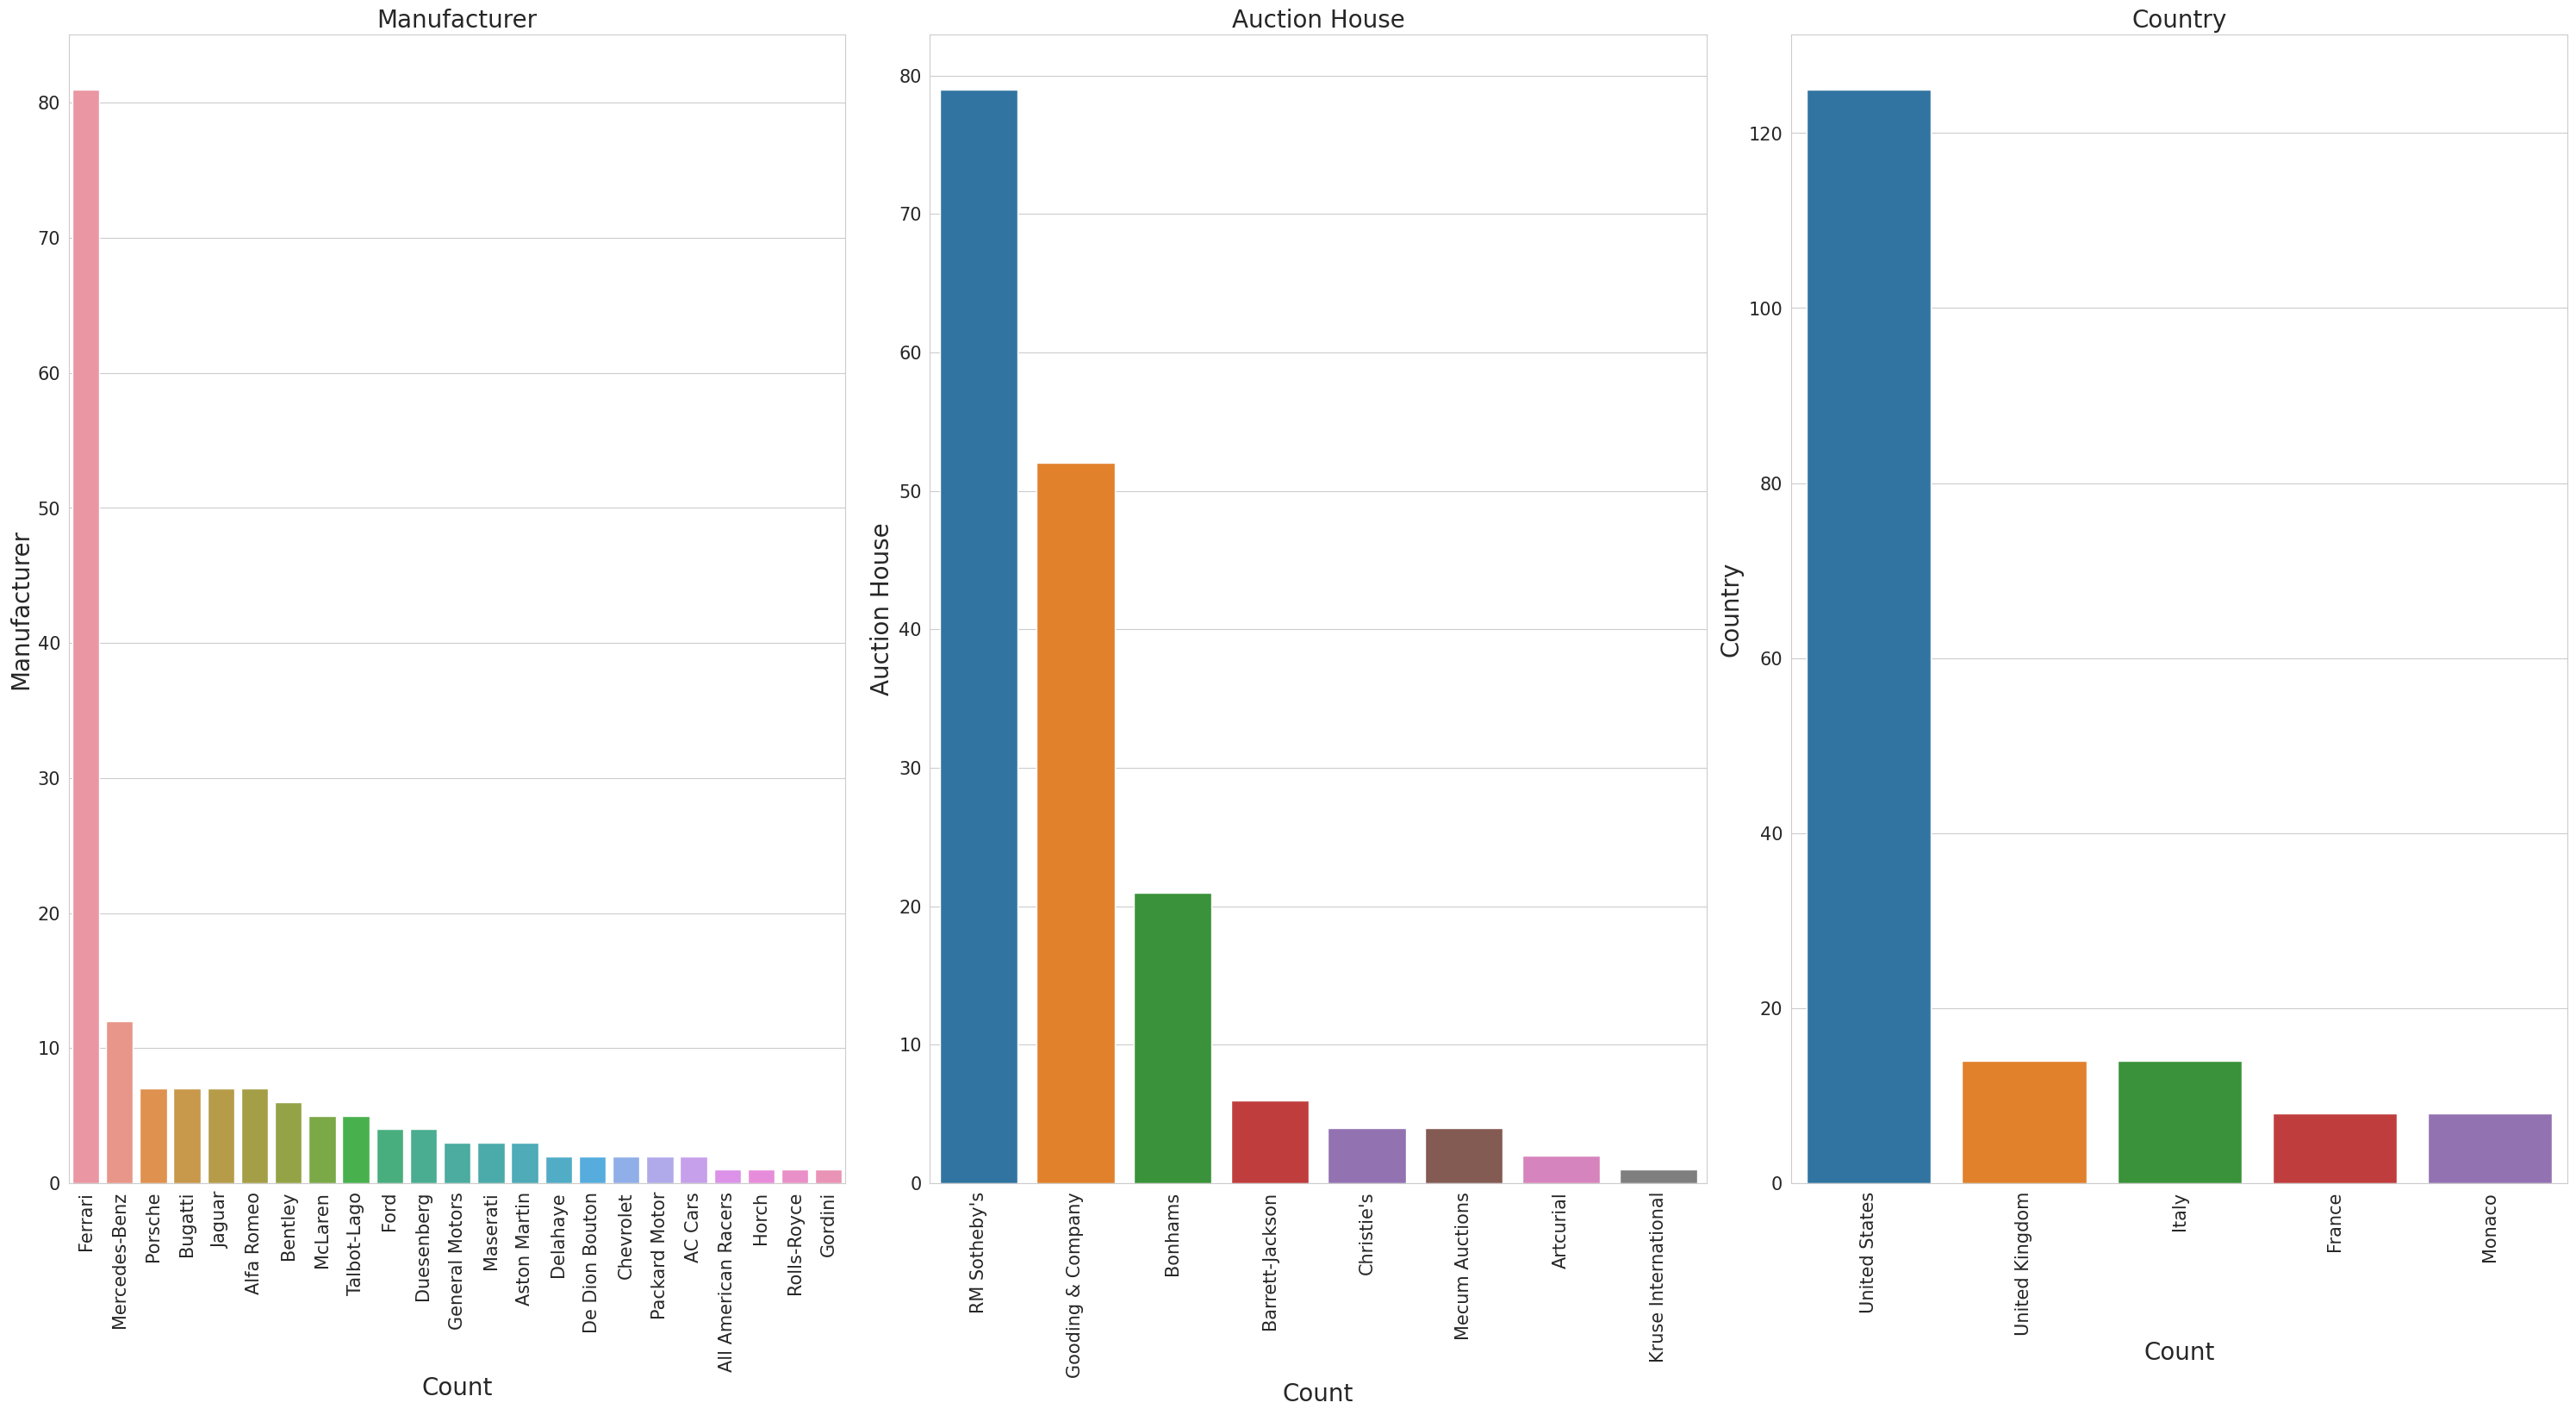

In [ ]:
# Creating bar plots for categorical columns (Manufacturer, Auction House and Country)

# Get the list of columns which data type is object (categorical)
categorical_col = df.select_dtypes(include = 'object').columns

plt.figure(figsize = (40, 30)) # Set the size of entire figure
plt.subplots_adjust(hspace = 0.5) # Adjust the vertical space between plots

# Looping through each categorical columns and creating plots for each column
for i, column in enumerate(categorical_col):
    plt.subplot(2, (len(categorical_col)+1)//1, i+1) # Creating plots in a 3 row grid
    # Create bar plot for the count of each category in the current column
    sns.barplot(data = df[column].value_counts().reset_index(),
                x = 'index',
                y = column)

    # Set title and x,y label
    plt.title(column, fontsize = 20)
    plt.ylabel(column, fontsize = 20)
    plt.xlabel('Count', fontsize = 20)
    plt.xticks(rotation = 90, fontsize = 15)
    plt.yticks(fontsize = 15)

plt.tight_layout() # Adjust layout to prevent overlap of subplots
plt.show() # Show the plot

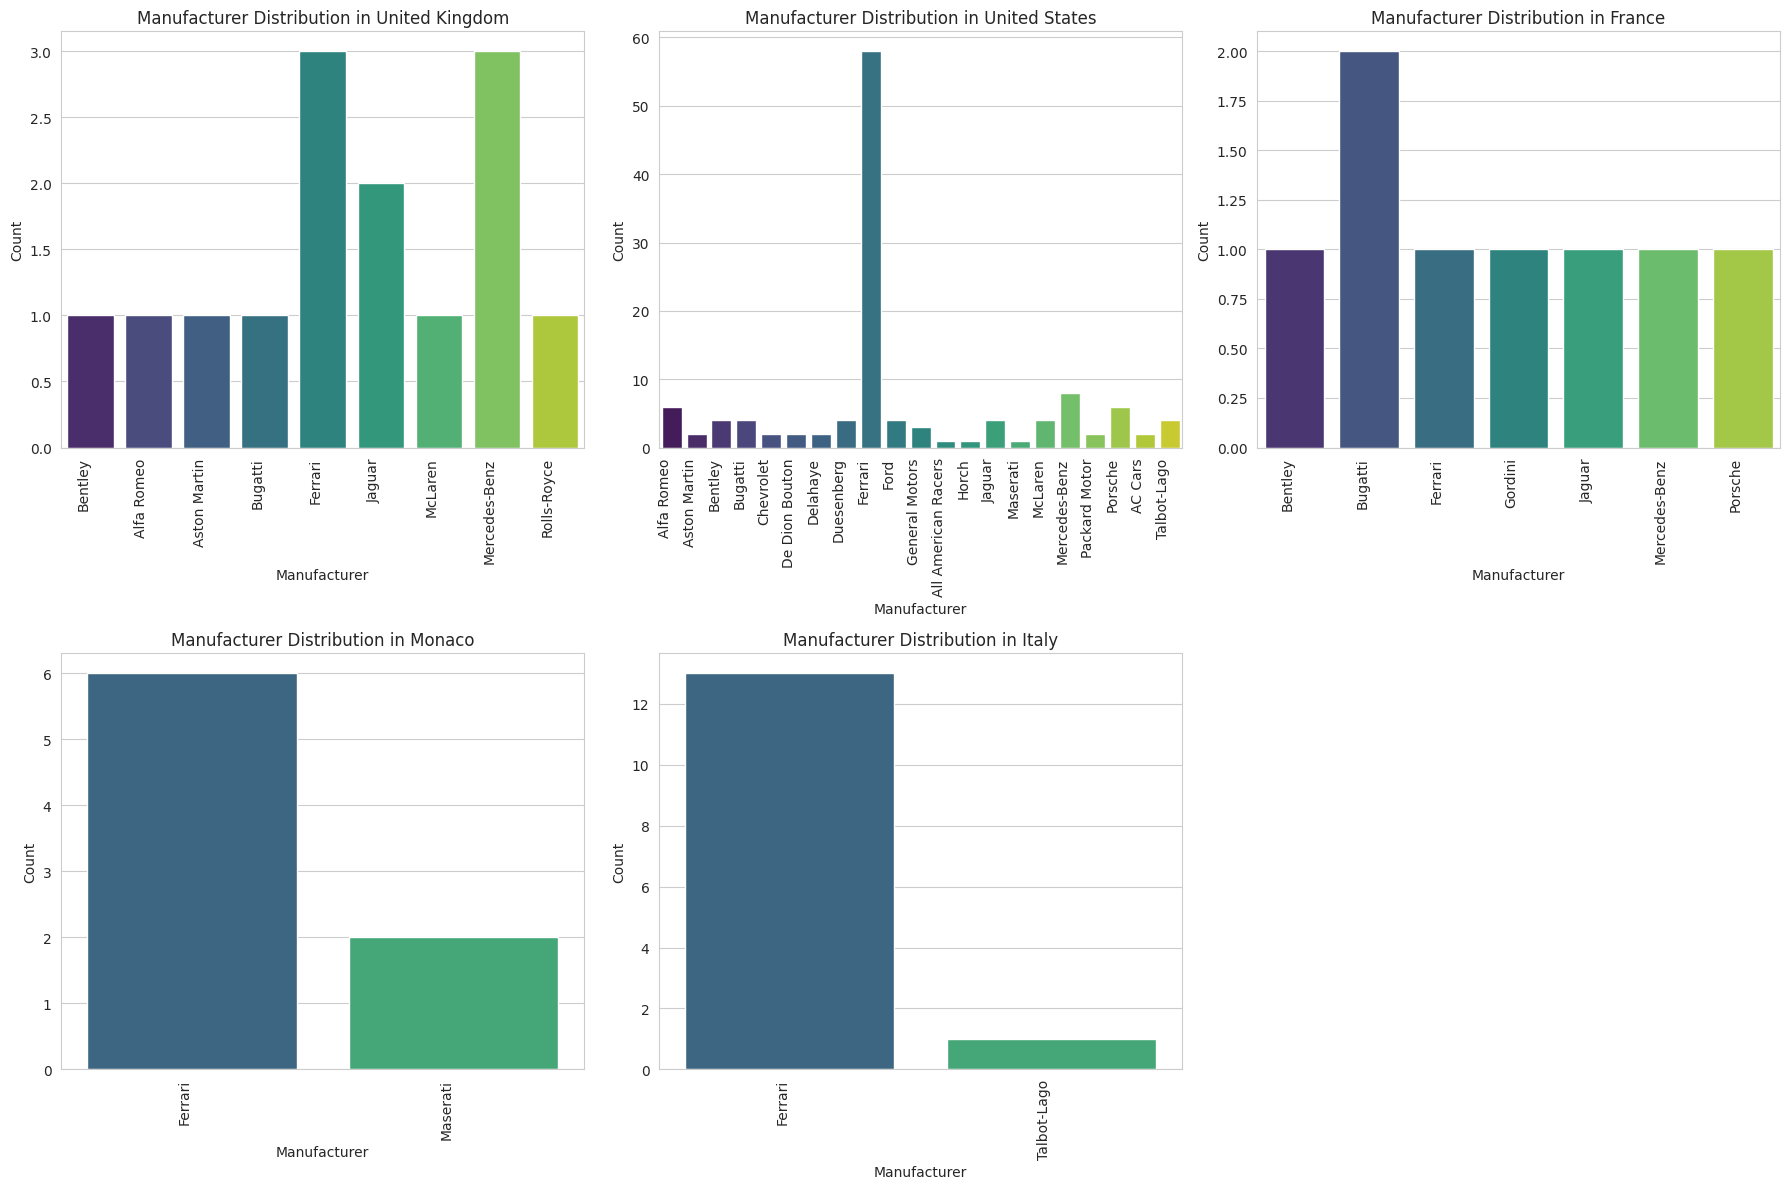

In [ ]:
# Get the list of unique countries in Country column
countries = df['Country'].unique()

# Create subplots with three plots in a row
num_plots = len(countries)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(18, num_rows * 6))
plt.subplots_adjust(hspace = 1)

for i, country in enumerate(countries):
    plt.subplot(num_rows, num_cols, i + 1)

    df_country = df[df['Country'] == country]

    # Create a countplot using Seaborn
    sns.countplot(data=df_country, x='Manufacturer', palette='viridis')  # You can choose a different palette
    plt.title(f'Manufacturer Distribution in {country}')
    plt.xlabel('Manufacturer')
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show() # Show plots

**Numerical Variables**

Checking Outliers

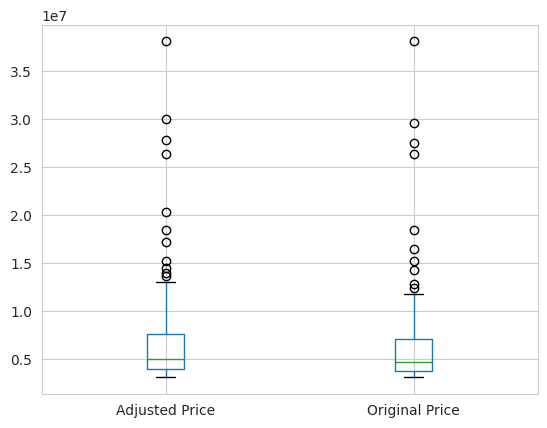

In [ ]:
boxplot = df.boxplot(column=['Adjusted Price', 'Original Price'])

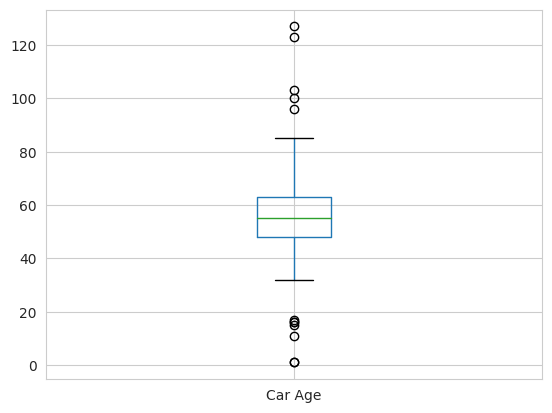

In [ ]:
boxplot = df.boxplot(column = ['Car Age'])

There are outliers found in Adjusted Price, Original Price and Car Age

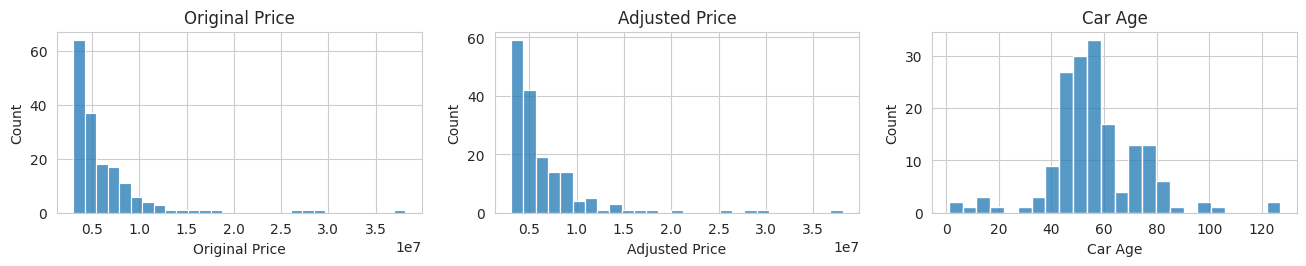

<Figure size 640x480 with 0 Axes>

In [ ]:
# Histograms for numeric values
numeric_columns = df.select_dtypes(['int', 'float']).columns
plt.figure(figsize = (16, 8))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, len(numeric_columns)//1, i+1)
    sns.histplot(df[column])
    plt.title(column)

plt.show()
plt.tight_layout()

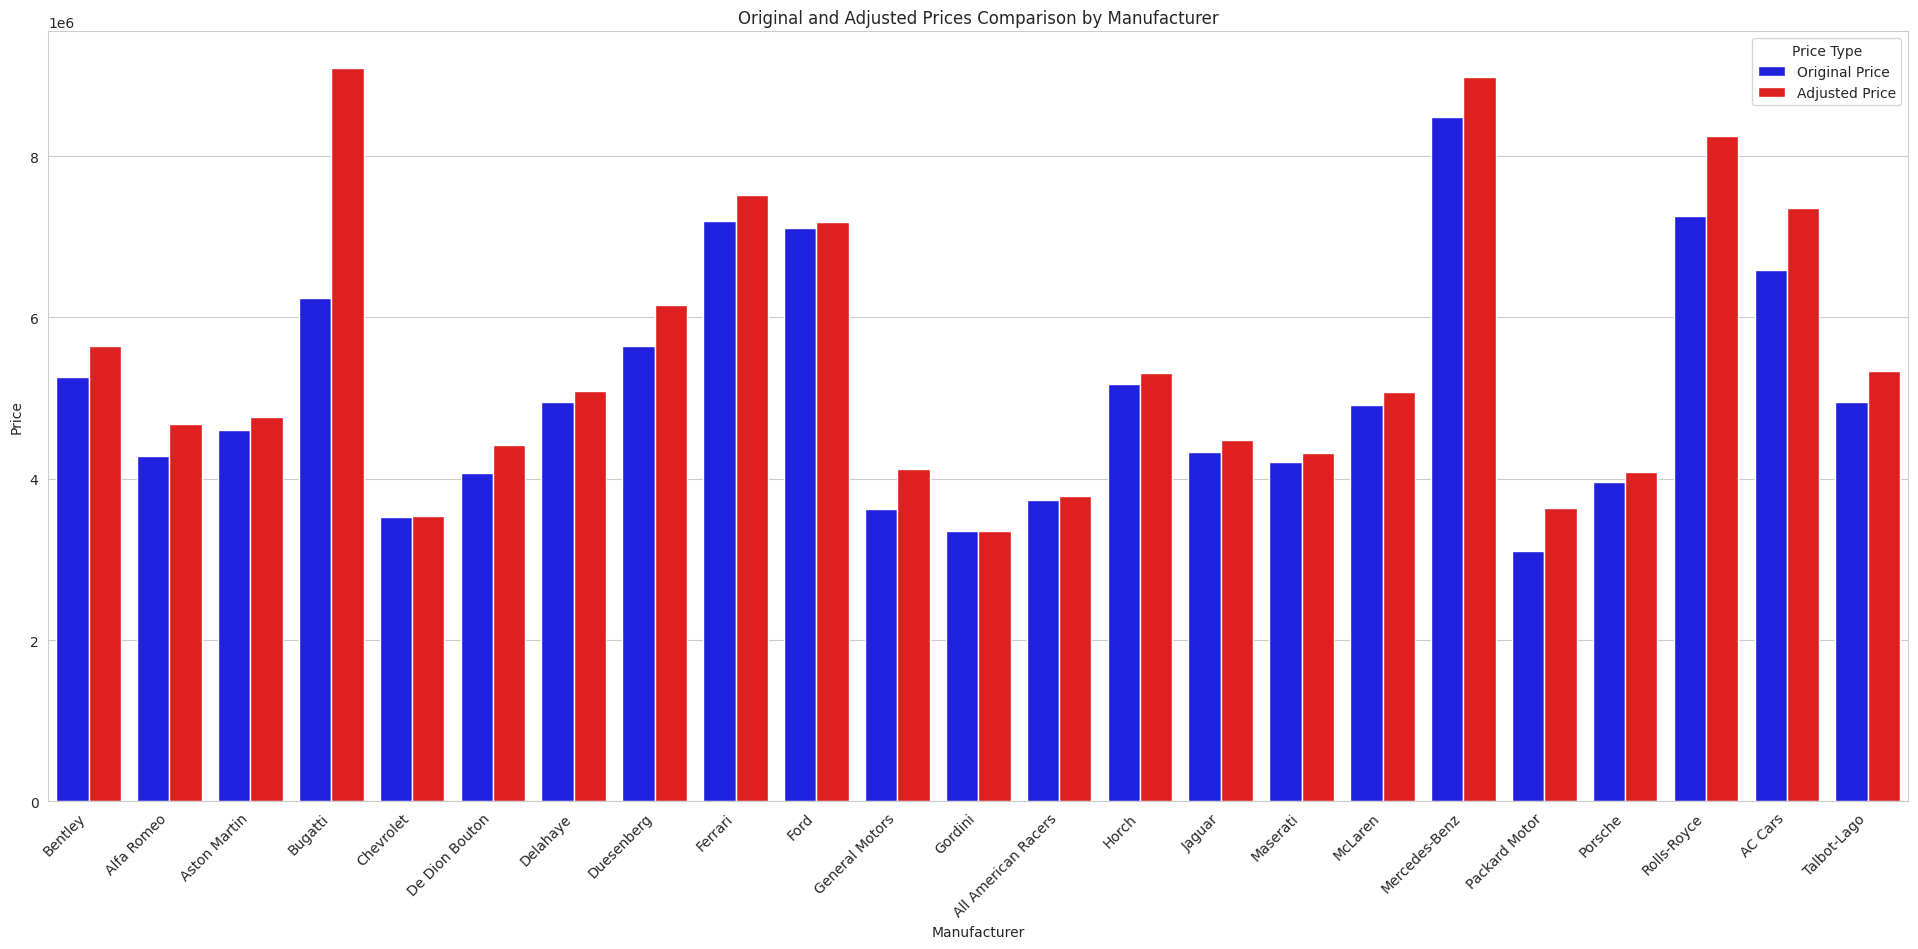

In [ ]:
# Creating bar plot to see the comparison of Original Price and Adjusted Price from each Manufacturer

# Create a DataFrame with 'Manufacturer', 'Original Price', and 'Adjusted Price'
manufacturer_prices = df[['Manufacturer', 'Original Price', 'Adjusted Price']]

# Melt the DataFrame to make it suitable for Seaborn
melted_df = pd.melt(manufacturer_prices, id_vars='Manufacturer',
                    var_name = 'Price Type', value_name = 'Price')

plt.figure(figsize = (24, 10))  # Set the size of entire figure

sns.barplot(data = melted_df,
            x = 'Manufacturer',
            y = 'Price',
            hue = 'Price Type',
            ci = None, # ci=None to remove error bars
            palette={'Original Price': 'blue', 'Adjusted Price': 'red'})

plt.title('Original and Adjusted Prices Comparison by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#**Data Modelling (Explore the models)**

###Data Splitting

In [ ]:
#Input all variables except Adjusted Price (target)
input_df = df.drop('Adjusted Price',axis = 1)
output_df = df['Adjusted Price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [ ]:
# Seeing the first 5 rows of our training set
x_train.head()

,Manufacturer,Auction House,Original Price,Car Age,Country
69,Ferrari,RM Sotheby's,4510000,47,United States
137,McLaren,RM Sotheby's,3520000,39,United States
2,Alfa Romeo,Gooding & Company,4840000,65,United States
93,Ferrari,Gooding & Company,4730000,59,United States
135,McLaren,Gooding & Company,8470000,16,United States


In [ ]:
# Checking the shape of training set
# our training set has 135 rows and 5 columns
x_train.shape

(135, 5)

In [ ]:
x_test.head()

,Manufacturer,Auction House,Original Price,Car Age,Country
138,Mercedes-Benz,Gooding & Company,4620000,57,United States
30,Duesenberg,Gooding & Company,10340000,80,United States
119,General Motors,Barrett-Jackson,4320000,56,United States
29,Delahaye,RM Sotheby's,3300000,61,United States
143,Mercedes-Benz,RM Sotheby's,7480000,74,United States


In [ ]:
# Checking the shape of testing set
# our testing set has 34 rows and 5 columns
x_test.shape

(34, 5)

###Handling Missing Values

In [ ]:
# Checking the missing values in training set
x_train.isna().sum()

,0
Manufacturer,1
Auction House,0
Original Price,0
Car Age,0
Country,0


There is one missing value found in Manufacturer

In [ ]:
# Find the mode of Manufacturer to impute missing value
print("Mode of Manufacturer :", st.mode(x_train['Manufacturer']))

Mode of Manufacturer : Ferrari


In [ ]:
# Impute missing values with mode
x_train['Manufacturer'].fillna('Ferrari', inplace = True)
x_test['Manufacturer'].fillna('Ferrari', inplace = True)

In [ ]:
x_train.isna().sum()

,0
Manufacturer,0
Auction House,0
Original Price,0
Car Age,0
Country,0


In [ ]:
x_test.isna().sum()

,0
Manufacturer,0
Auction House,0
Original Price,0
Car Age,0
Country,0


Now there are no missing value found in training and testing set

###Feature Engineering (Encoding)

**Auction House -> Feature Encoding**

Training Set

In [ ]:
x_train['Auction House'].value_counts()

,count
Auction House,
RM Sotheby's,64
Gooding & Company,42
Bonhams,19
Mecum Auctions,3
Barrett-Jackson,2
Christie's,2
Artcurial,2
Kruse International,1


In [ ]:
# Count the frequency of each value
value_counts = x_train['Auction House'].value_counts()

# Take the top 3 values
top_values = value_counts.index[:3]

# Create a dictionary for mapping values to numerical labels
mapping_dict = {value: i + 1 for i, value in enumerate(top_values)}

##### Finding the original value and encoded label #####
# Extract unique values in the 'Auction House' column before encoding
original_values = x_train['Auction House'].unique()

# Create a list of tuples containing original values and their corresponding encoded labels
encoded_info = [(value, mapping_dict.get(value, 4)) for value in original_values]

# # Print the list of original values and their corresponding encoded labels
print("Original Values and Encoded Labels:")
for value, encoded_label in encoded_info:
    print(f'Original Value: {value}, Encoded Label: {encoded_label}')

# Replace the top 3 values in the 'Auction House' column with numerical labels,
# and label 4 for 'others'
x_train['Auction House'] = x_train['Auction House'].map(mapping_dict).fillna(4)

# Display the DataFrame
x_train.head(5)

Original Values and Encoded Labels:
Original Value: RM Sotheby's, Encoded Label: 1
Original Value: Gooding & Company, Encoded Label: 2
Original Value: Barrett-Jackson, Encoded Label: 4
Original Value: Christie's, Encoded Label: 4
Original Value: Bonhams, Encoded Label: 3
Original Value: Mecum Auctions, Encoded Label: 4
Original Value: Artcurial, Encoded Label: 4
Original Value: Kruse International, Encoded Label: 4


,Manufacturer,Auction House,Original Price,Car Age,Country
69,Ferrari,1.0,4510000,47,United States
137,McLaren,1.0,3520000,39,United States
2,Alfa Romeo,2.0,4840000,65,United States
93,Ferrari,2.0,4730000,59,United States
135,McLaren,2.0,8470000,16,United States


In [ ]:
x_train['Auction House'].value_counts().sort_index()

,count
Auction House,
1.0,64
2.0,42
3.0,19
4.0,10


Testing Set

In [ ]:
x_test['Auction House'].value_counts()

,count
Auction House,
RM Sotheby's,15
Gooding & Company,10
Barrett-Jackson,4
Bonhams,2
Christie's,2
Mecum Auctions,1


In [ ]:
# Count the frequency of each value
value_counts = x_test['Auction House'].value_counts()

# Take the top 3 values
top_values = value_counts.index[:3]

# Create a dictionary for mapping values to numerical labels
mapping_dict = {value: i + 1 for i, value in enumerate(top_values)}

# Replace the top 5 values in the 'Auction House' column with numerical labels,
# and label 6 for 'others'
x_test['Auction House'] = x_test['Auction House'].map(mapping_dict).fillna(4)

# Display the DataFrame
x_test.head(5)

,Manufacturer,Auction House,Original Price,Car Age,Country
138,Mercedes-Benz,2.0,4620000,57,United States
30,Duesenberg,2.0,10340000,80,United States
119,General Motors,3.0,4320000,56,United States
29,Delahaye,1.0,3300000,61,United States
143,Mercedes-Benz,1.0,7480000,74,United States


In [ ]:
x_test['Auction House'].value_counts().sort_index()

,count
Auction House,
1.0,15
2.0,10
3.0,4
4.0,5


**Manufacturer**

Training Set

In [ ]:
x_train['Manufacturer'].value_counts()

,count
Manufacturer,
Ferrari,66
Mercedes-Benz,10
Alfa Romeo,7
Jaguar,7
Porsche,6
Bugatti,5
McLaren,4
Talbot-Lago,4
Ford,4


In [ ]:
# Count the frequency of each value
value_counts = x_train['Manufacturer'].value_counts()

# Take the top 2 values
top_values = value_counts.index[:2]

# Create a dictionary for mapping values to numerical labels
mapping_dict = {value: i + 1 for i, value in enumerate(top_values)}

##### Finding the original value and encoded label #####
# Extract unique values in the 'Manufacturer' column before encoding
original_values = x_train['Manufacturer'].unique()

# Create a list of tuples containing original values and their corresponding encoded labels
encoded_info = [(value, mapping_dict.get(value, 3)) for value in original_values]

# # Print the list of original values and their corresponding encoded labels
print("Original Values and Encoded Labels:")
for value, encoded_label in encoded_info:
    print(f'Original Value: {value}, Encoded Label: {encoded_label}')

# Replace the top 5 values in the 'Manufacturer' column with numerical labels,
# and label 6 for 'others'
x_train['Manufacturer'] = x_train['Manufacturer'].map(mapping_dict).fillna(3)

# Display the DataFrame
x_train.head(5)

Original Values and Encoded Labels:
Original Value: Ferrari, Encoded Label: 1
Original Value: McLaren, Encoded Label: 3
Original Value: Alfa Romeo, Encoded Label: 3
Original Value: General Motors, Encoded Label: 3
Original Value: De Dion Bouton, Encoded Label: 3
Original Value: Mercedes-Benz, Encoded Label: 2
Original Value: Jaguar, Encoded Label: 3
Original Value: Bugatti, Encoded Label: 3
Original Value: Porsche, Encoded Label: 3
Original Value: Maserati, Encoded Label: 3
Original Value: Duesenberg, Encoded Label: 3
Original Value: Aston Martin, Encoded Label: 3
Original Value: Ford, Encoded Label: 3
Original Value: Bentley, Encoded Label: 3
Original Value: Gordini, Encoded Label: 3
Original Value: Delahaye, Encoded Label: 3
Original Value: Chevrolet, Encoded Label: 3
Original Value: Talbot-Lago, Encoded Label: 3
Original Value: Horch, Encoded Label: 3
Original Value: Packard Motor, Encoded Label: 3
Original Value: Rolls-Royce, Encoded Label: 3
Original Value: AC Cars, Encoded Label:

,Manufacturer,Auction House,Original Price,Car Age,Country
69,1.0,1.0,4510000,47,United States
137,3.0,1.0,3520000,39,United States
2,3.0,2.0,4840000,65,United States
93,1.0,2.0,4730000,59,United States
135,3.0,2.0,8470000,16,United States


In [ ]:
x_train['Manufacturer'].value_counts().sort_index()

,count
Manufacturer,
1.0,66
2.0,10
3.0,59


In [ ]:
# Count the frequency of each value
value_counts = x_test['Manufacturer'].value_counts()

# Take the top 2 values
top_values = value_counts.index[:2]

# Create a dictionary for mapping values to numerical labels
mapping_dict = {value: i + 1 for i, value in enumerate(top_values)}

# Replace the top 5 values in the 'Manufacturer' column with numerical labels,
# and label 3 for 'others'
x_test['Manufacturer'] = x_test['Manufacturer'].map(mapping_dict).fillna(3)

# Display the DataFrame
x_test.head(5)

,Manufacturer,Auction House,Original Price,Car Age,Country
138,3.0,2.0,4620000,57,United States
30,3.0,2.0,10340000,80,United States
119,3.0,3.0,4320000,56,United States
29,3.0,1.0,3300000,61,United States
143,3.0,1.0,7480000,74,United States


In [ ]:
x_test['Manufacturer'].value_counts()

,count
Manufacturer,
1.0,16
3.0,15
2.0,3


**Country**

In [ ]:
x_train['Country'].value_counts()

,count
Country,
United States,98
United Kingdom,12
Italy,11
Monaco,8
France,6


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
labelEnc = LabelEncoder()

# Fit and transform the 'Country' column
x_train['Country'] = labelEnc.fit_transform(x_train['Country'])

# Get the mapping between original labels and encoded values
label_mapping = dict(zip(labelEnc.classes_, labelEnc.transform(labelEnc.classes_)))

# Print the mapping
#print("Mapping of original labels to encoded values:")
print(label_mapping)

x_train.head()

{'France': 0, 'Italy': 1, 'Monaco': 2, 'United Kingdom': 3, 'United States': 4}


,Manufacturer,Auction House,Original Price,Car Age,Country
69,1.0,1.0,4510000,47,4
137,3.0,1.0,3520000,39,4
2,3.0,2.0,4840000,65,4
93,1.0,2.0,4730000,59,4
135,3.0,2.0,8470000,16,4


In [ ]:
x_train['Country'].value_counts().sort_index()

,count
Country,
0,6
1,11
2,8
3,12
4,98


In [ ]:
# Initialize the LabelEncoder
labelEnc = LabelEncoder()

# Fit and transform the 'Country' column
x_test['Country'] = labelEnc.fit_transform(x_test['Country'])

# Get the mapping between original labels and encoded values
label_mapping = dict(zip(labelEnc.classes_, labelEnc.transform(labelEnc.classes_)))

# Print the mapping
#print("Mapping of original labels to encoded values:")
print(label_mapping)

x_test.head()

{'France': 0, 'Italy': 1, 'United Kingdom': 2, 'United States': 3}


,Manufacturer,Auction House,Original Price,Car Age,Country
138,3.0,2.0,4620000,57,3
30,3.0,2.0,10340000,80,3
119,3.0,3.0,4320000,56,3
29,3.0,1.0,3300000,61,3
143,3.0,1.0,7480000,74,3


In [ ]:
x_test['Country'].value_counts().sort_index()

,count
Country,
0,2
1,3
2,2
3,27


**Correlation**

In [ ]:
correlation_matrix = x_train.corr()
# target_correlation = correlation_matrix['Adjusted Price']
# target_correlation

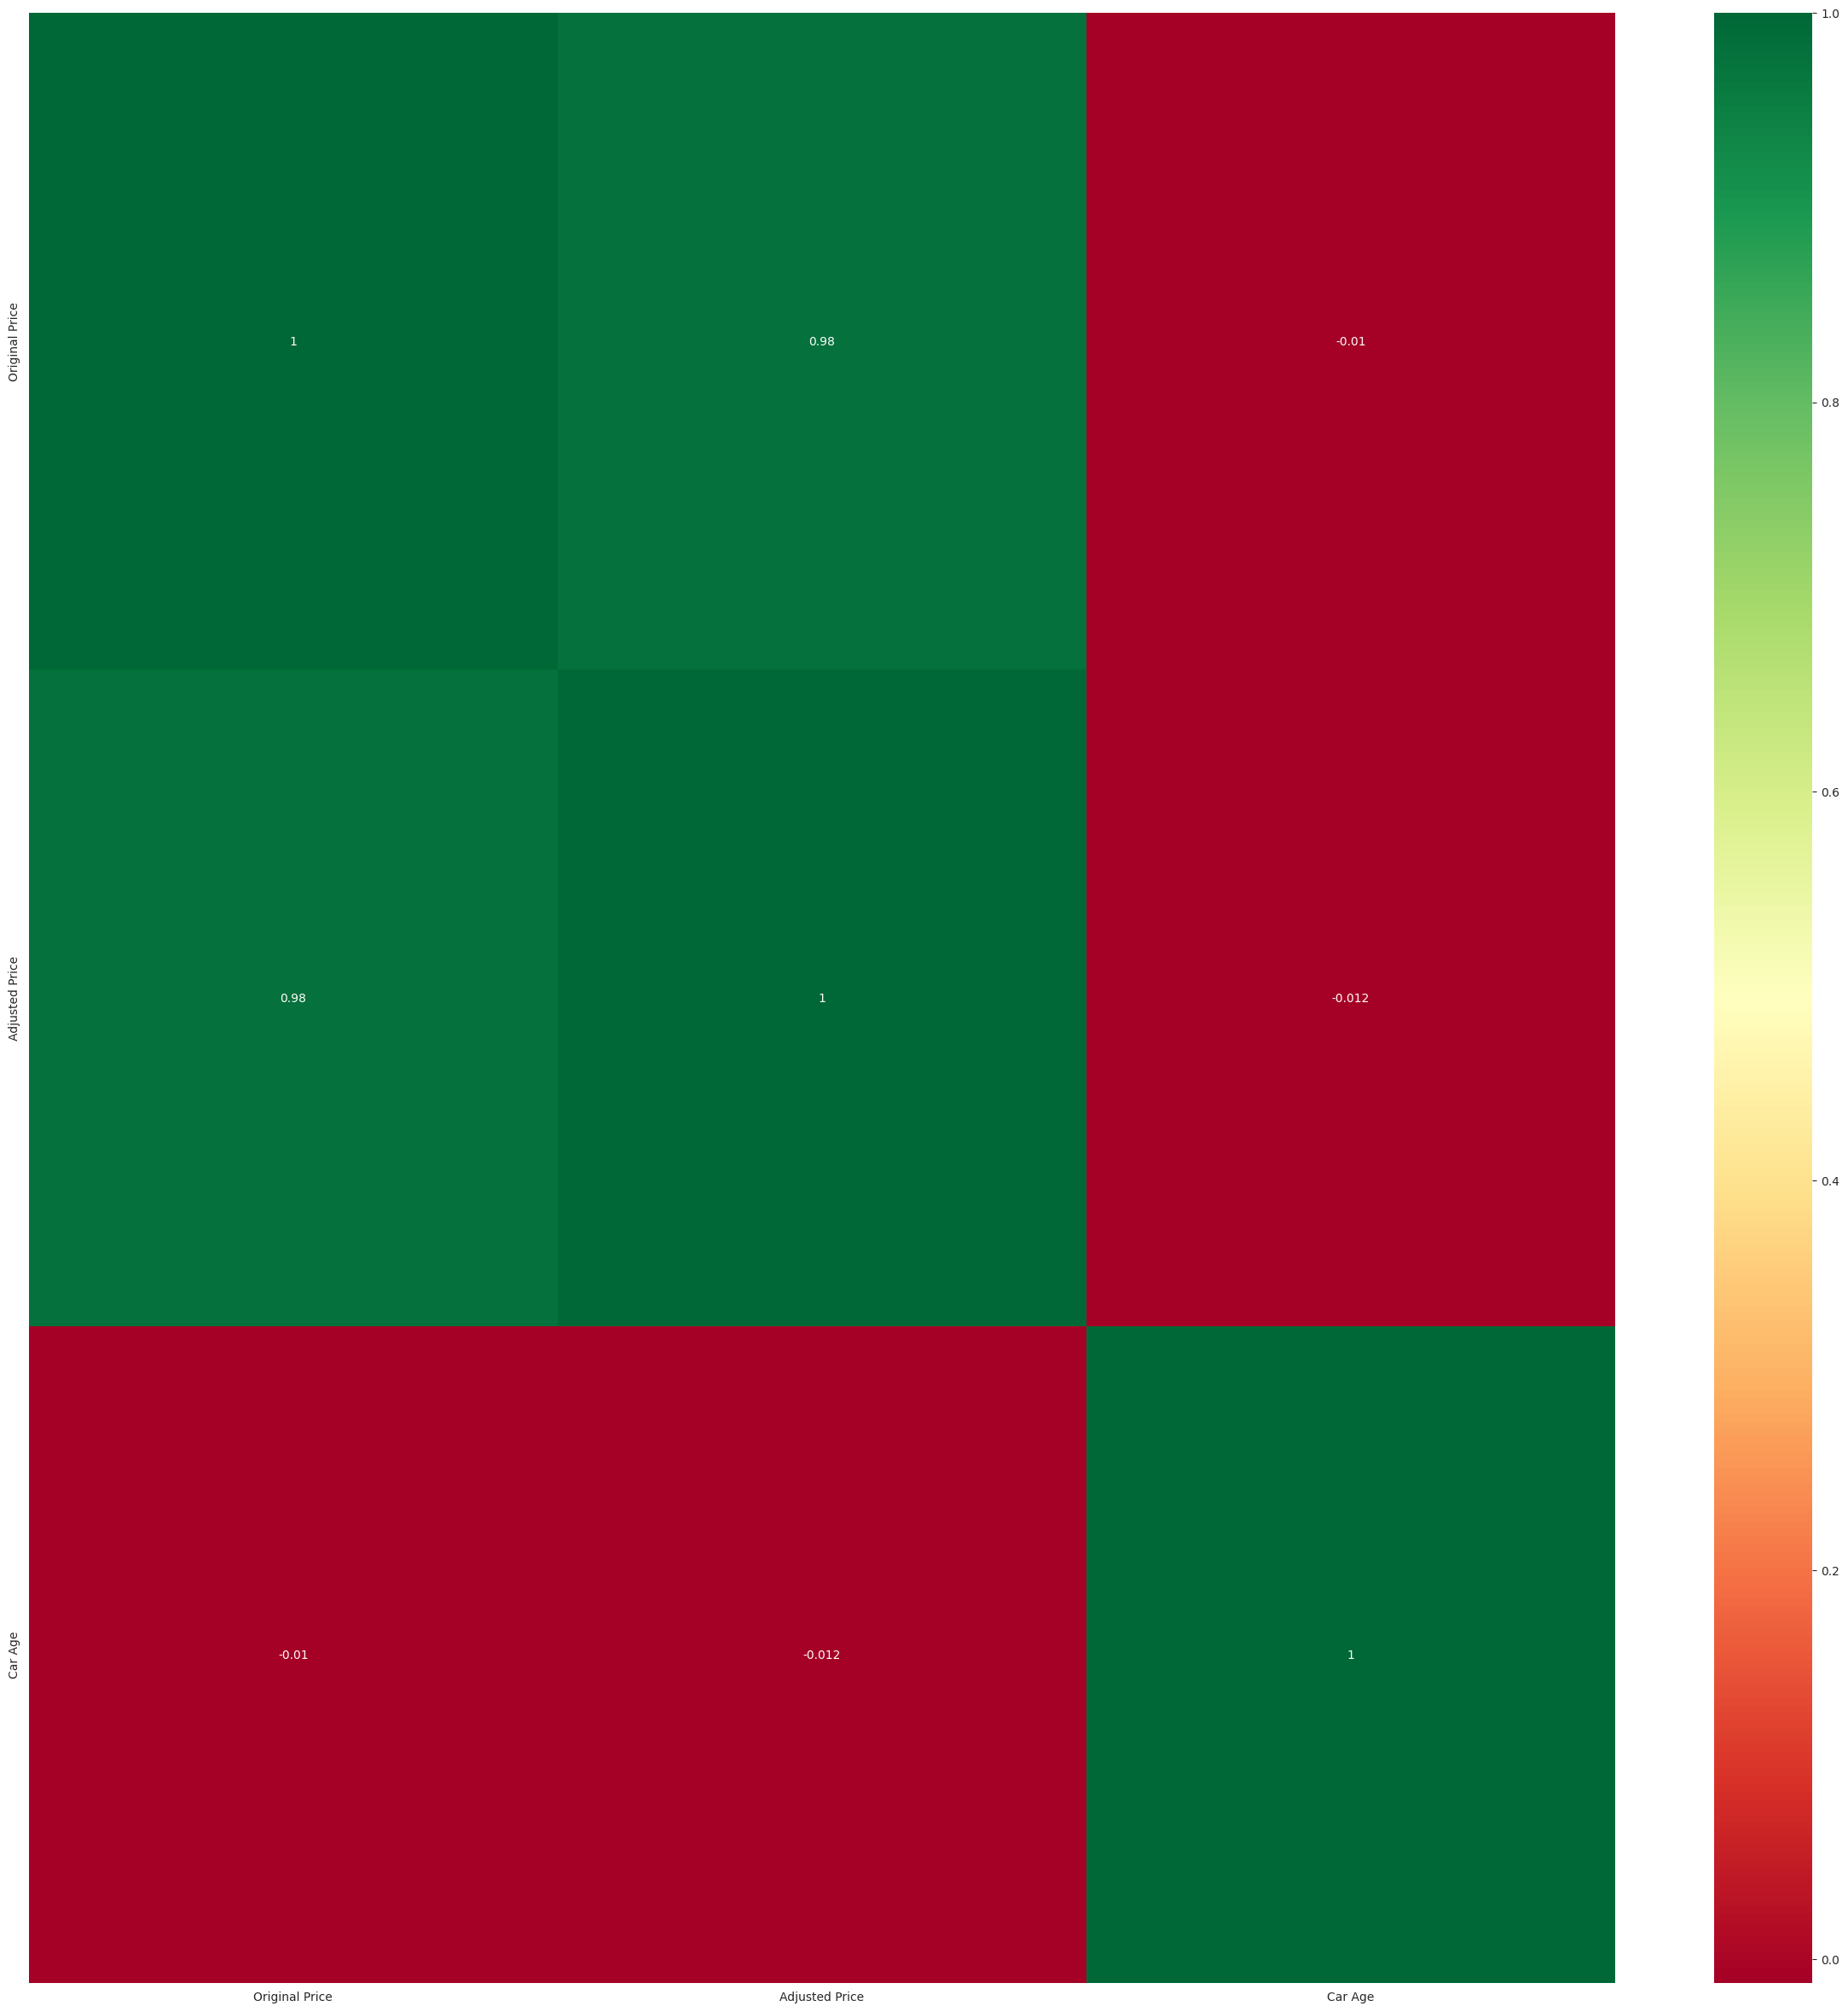

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
feature_importances = model.feature_importances_

In [ ]:
print(feature_importances)

[0.00140996 0.00669932 0.9803195  0.00901411 0.00255712]


In [ ]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Adjusted Price']
target_correlation

Original Price    0.977336
Adjusted Price    1.000000
Car Age          -0.012315
Name: Adjusted Price, dtype: float64

##**Modelling**

In [ ]:
# Import libraries we are going to use for modelling
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Checking the performance metrics for Training and Testing Set

# Create an Evaluate Function to give all metrics after model Training
def evaluate_model_regression(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "GB Regressor": GradientBoostingRegressor(),
    "SVR": SVR()
}

print("Model Performance for Training and Testing Set")
# Iterate through the models and train/evaluate them
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    mae_train, mse_train, rmse_train, r2_train = evaluate_model_regression(y_train, y_train_pred)
    mae_test, mse_test, rmse_test, r2_test = evaluate_model_regression(y_test, y_test_pred)

    print(model_name)
    print('Model performance for Training set')
    print("- MAE: {:.4f}".format(mae_train))
    print("- MSE: {:.4f}".format(mse_train))
    print("- RMSE: {:.4f}".format(rmse_train))
    print("- R2 Score: {:.4f}".format(r2_train))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- MAE: {:.4f}".format(mae_test))
    print("- MSE: {:.4f}".format(mse_test))
    print("- RMSE: {:.4f}".format(rmse_test))
    print("- R2 Score: {:.4f}".format(r2_test))
    print('=' * 35)
    print('\n')

Model Performance for Training and Testing Set
Linear Regression
Model performance for Training set
- MAE: 353723.1235
- MSE: 510078627525.8826
- RMSE: 714197.8910
- R2 Score: 0.9779
----------------------------------
Model performance for Test set
- MAE: 554221.2607
- MSE: 2907662116862.5293
- RMSE: 1705186.8276
- R2 Score: 0.8900


K-Neighbors Regressor
Model performance for Training set
- MAE: 493197.6044
- MSE: 1794225658942.9578
- RMSE: 1339487.0880
- R2 Score: 0.9221
----------------------------------
Model performance for Test set
- MAE: 744166.1941
- MSE: 3695666906332.1416
- RMSE: 1922411.7421
- R2 Score: 0.8602


Decision Tree Regressor
Model performance for Training set
- MAE: 0.0000
- MSE: 0.0000
- RMSE: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- MAE: 1002870.6176
- MSE: 4355284553663.5586
- RMSE: 2086931.8517
- R2 Score: 0.8352


Random Forest Regressor
Model performance for Training set
- MAE: 214326.4739
- MSE: 345834692

In [ ]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model_regression(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "GB Regressor": GradientBoostingRegressor(),
    "SVR": SVR()
}

# Create dictionaries to store performance metrics for each model
train_metrics = {'MAE': {}, 'MSE': {}, 'RMSE': {}, 'R2': {}}
test_metrics = {'MAE': {}, 'MSE': {}, 'RMSE': {}, 'R2': {}}

print("Model Performance for Training and Testing Set")
# Iterate through the models and train/evaluate them
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    mae_train, mse_train, rmse_train, r2_train = evaluate_model_regression(y_train, y_train_pred)
    mae_test, mse_test, rmse_test, r2_test = evaluate_model_regression(y_test, y_test_pred)

    # Store metrics in dictionaries
    train_metrics['MAE'][model_name] = mae_train
    train_metrics['MSE'][model_name] = mse_train
    train_metrics['RMSE'][model_name] = rmse_train
    train_metrics['R2'][model_name] = r2_train

    test_metrics['MAE'][model_name] = mae_test
    test_metrics['MSE'][model_name] = mse_test
    test_metrics['RMSE'][model_name] = rmse_test
    test_metrics['R2'][model_name] = r2_test

    print(model_name)
    print('Model performance for Training set')
    print("- MAE: {:.4f}".format(mae_train))
    print("- MSE: {:.4f}".format(mse_train))
    print("- RMSE: {:.4f}".format(rmse_train))
    print("- R2 Score: {:.4f}".format(r2_train))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- MAE: {:.4f}".format(mae_test))
    print("- MSE: {:.4f}".format(mse_test))
    print("- RMSE: {:.4f}".format(rmse_test))
    print("- R2 Score: {:.4f}".format(r2_test))
    print('=' * 35)
    print('\n')

Model Performance for Training and Testing Set
Linear Regression
Model performance for Training set
- MAE: 353723.1235
- MSE: 510078627525.8826
- RMSE: 714197.8910
- R2 Score: 0.9779
----------------------------------
Model performance for Test set
- MAE: 554221.2607
- MSE: 2907662116862.5293
- RMSE: 1705186.8276
- R2 Score: 0.8900


K-Neighbors Regressor
Model performance for Training set
- MAE: 493197.6044
- MSE: 1794225658942.9578
- RMSE: 1339487.0880
- R2 Score: 0.9221
----------------------------------
Model performance for Test set
- MAE: 744166.1941
- MSE: 3695666906332.1416
- RMSE: 1922411.7421
- R2 Score: 0.8602


Decision Tree Regressor
Model performance for Training set
- MAE: 0.0000
- MSE: 0.0000
- RMSE: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- MAE: 989744.0294
- MSE: 4306985377349.9707
- RMSE: 2075327.7759
- R2 Score: 0.8370


Random Forest Regressor
Model performance for Training set
- MAE: 204570.6319
- MSE: 2730080021

In [ ]:
# Assigning the performance metric from the code above into a new variable

# Assign the metrics of training set for Linear Regression
LinReg_train_MSE = train_metrics['MSE']['Linear Regression']
LinReg_train_MAE = train_metrics['MAE']['Linear Regression']
LinReg_train_RMSE = train_metrics['RMSE']['Linear Regression']
LinReg_train_R2 = train_metrics['R2']['Linear Regression']

# Assign the metrics of testing set for Linear Regression
LinReg_test_MSE = test_metrics['MSE']['Linear Regression']
LinReg_test_MAE = test_metrics['MSE']['Linear Regression']
LinReg_test_RMSE = test_metrics['MSE']['Linear Regression']
LinReg_test_R2 = test_metrics['MSE']['Linear Regression']

# Assign the metrics of testing set for k-Neighbor

From observing the training and testing set, we can see that Decision Tree Regressor gives the best perfomance metric in Training Set where the MSE, MAE, RMSE and R2 Score is perfect. WHereas in Testing Set, the best performance metric is given by Linear Regression

In [ ]:
# DecisionTreeRegressor.fit(x_train, y_train)
# Train model
DecTree = DecisionTreeRegressor()
DecTree.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_predict = DecTree.predict(x_train) # Making the predictions of x_train using Decision Tree model

In [ ]:
# Printing y_train and y_predict to compare the values
print(y_train)
print(y_predict)

69     4940088
137    3563749
2      4900154
93     4858894
135    8575270
        ...   
71     5535408
106    4632899
14     4705262
92     3599459
102    5091159
Name: Adjusted Price, Length: 135, dtype: int64
[ 4940088.  3563749.  4900154.  4858894.  8575270.  3912401.  3863254.
  3864909.  4003569. 10148249.  5280000.  4996481. 14477729.  9460000.
  3953534.  8675277.  3300000.  3559422.  5026654.  4677420.  7851613.
  3616120.  5765443.  4843482.  3382500.  4843482.  6473174.  6779852.
  4594953.  9385869.  3627594.  3976168.  4294207.  6473953.  4996481.
  4109227.  3520000.  8122206.  4947835.  7000000. 11550000.  3251658.
  3346750.  6600000. 11582247.  6930000.  3239771.  3494209.  4853995.
 10175000.  4620000.  7860283.  5067017. 12972045.  7690936.  6440860.
  4449752. 12090736.  4008852.  4044770.  6875000.  5622771.  5562471.
  4519901.  3826507.  4510369. 38115000.  4691544.  6562904.  9293347.
  6160000.  7256794.  5310884.  3174631.  4290268.  8352536.  3190000.
  3750

If we compare y_train and y_predict, it is totally the same. This means the model we use, Decision Tree, is the best model to use for predicting the Adjusted Price

In [ ]:
# Assuming x_train and y_train are your training data
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_predict = model.predict(x_train)

# Calculate and print summary statistics
mse = mean_squared_error(y_train, y_predict)
print("Mean Squared Error:", mse)

# If you want more summary statistics, you can use pandas DataFrame
summary_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_predict})
print(summary_df.describe())

Mean Squared Error: 0.0
             Actual     Predicted
count  1.350000e+02  1.350000e+02
mean   6.578581e+06  6.578581e+06
std    4.817938e+06  4.817938e+06
min    3.080000e+06  3.080000e+06
25%    3.888655e+06  3.888655e+06
50%    4.996481e+06  4.996481e+06
75%    7.667861e+06  7.667861e+06
max    3.811500e+07  3.811500e+07


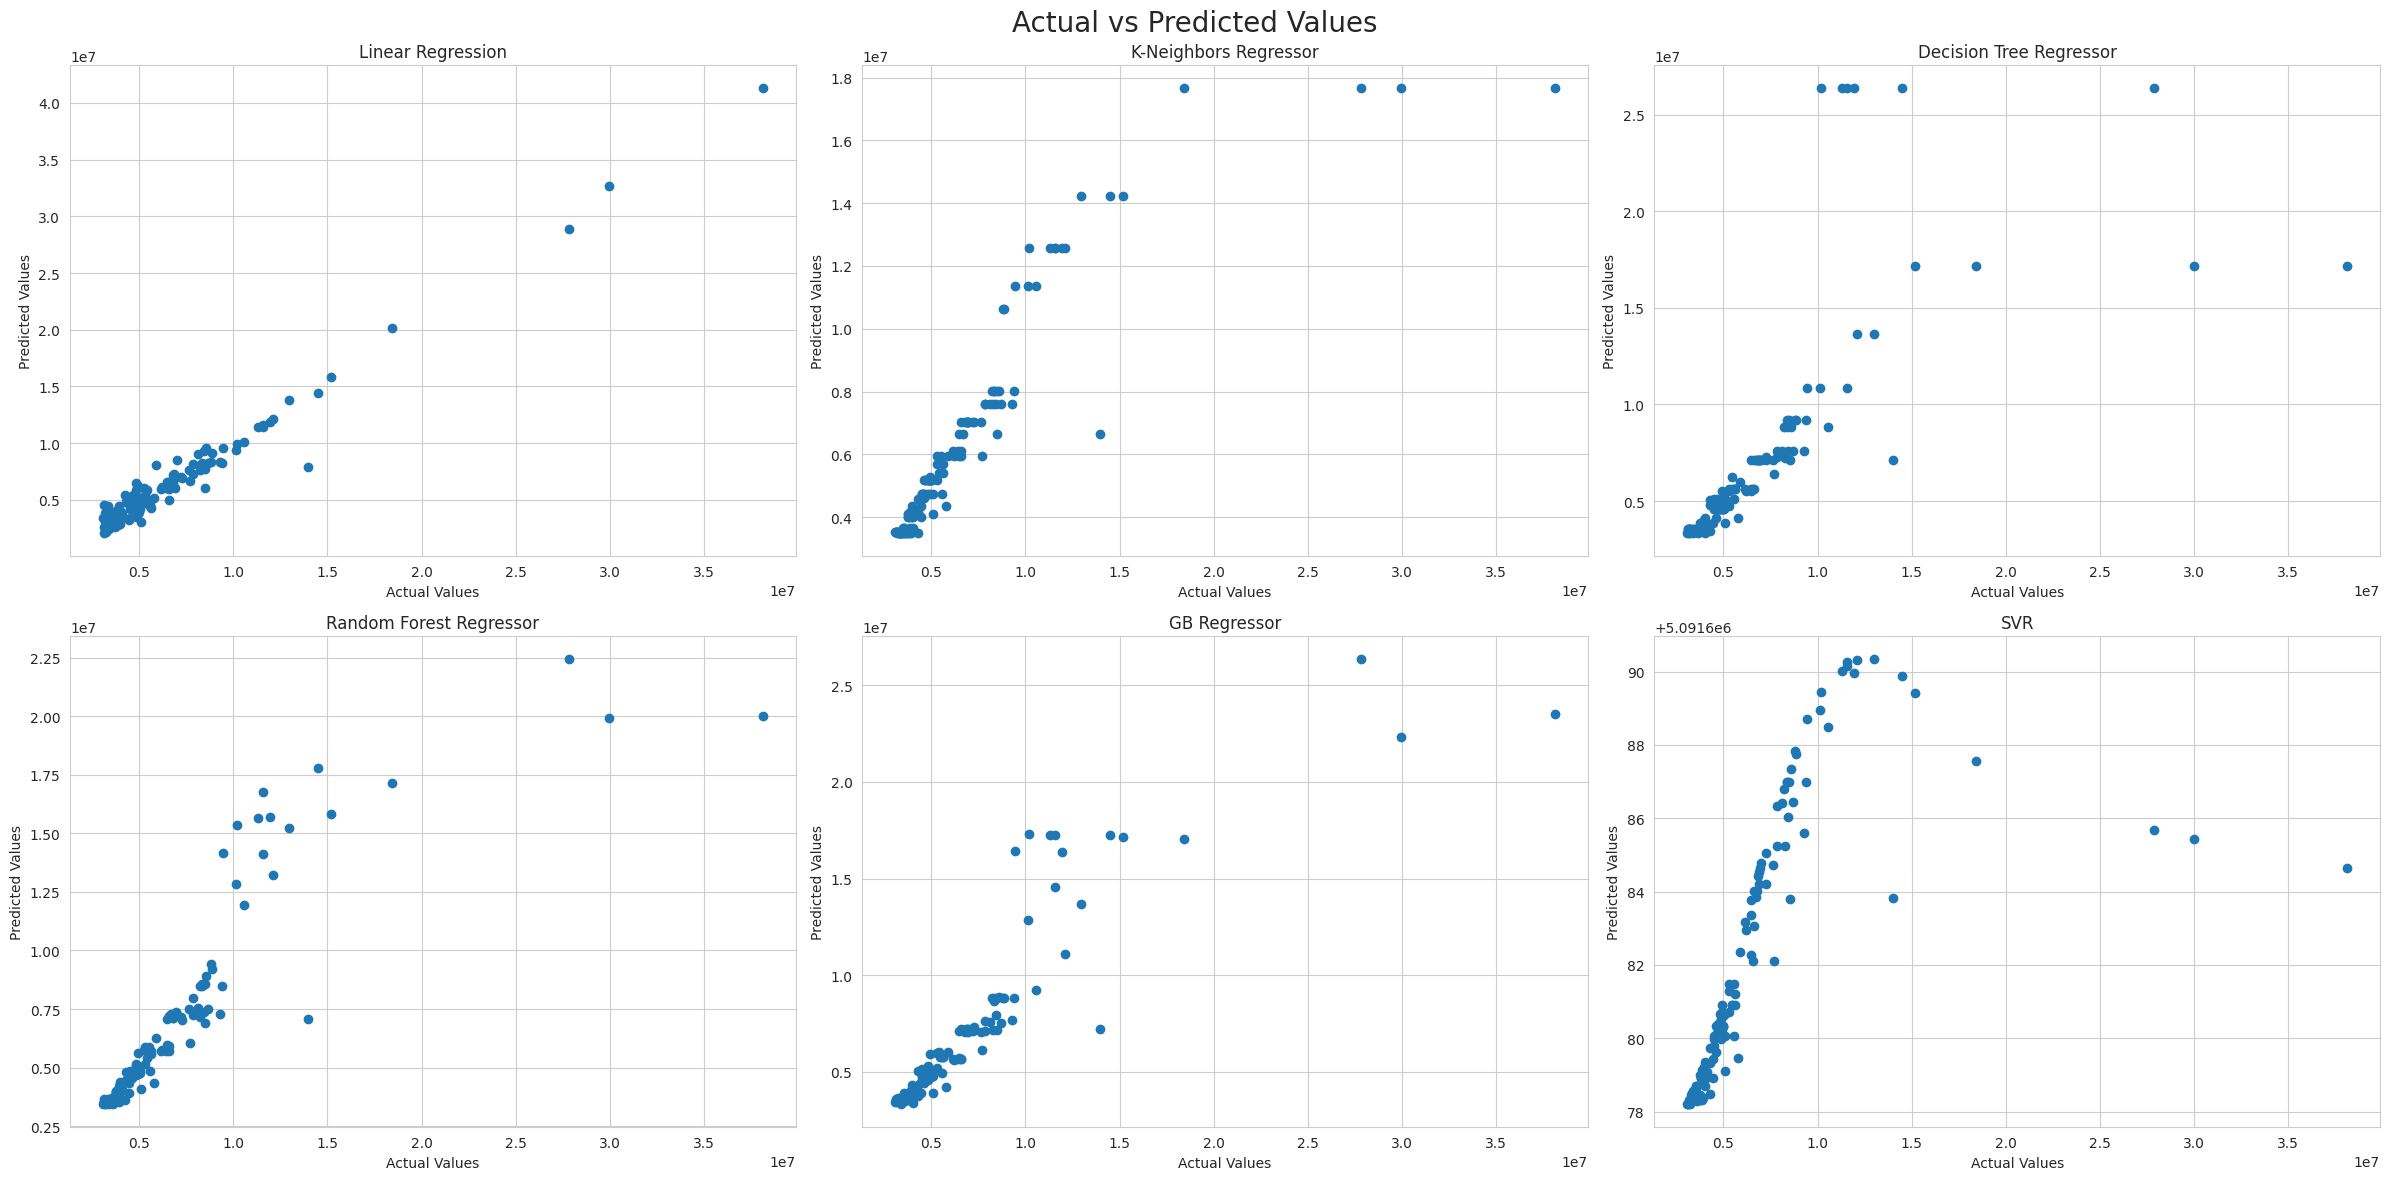

In [ ]:
# Make comparison for the actual values in training set of each models using scatter plot

# Define your classification models
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "GB Regressor": GradientBoostingRegressor(),
    "SVR": SVR()
}

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))
fig.suptitle('Actual vs Predicted Values', fontsize=20)

# Iterate through the models and train/evaluate them
for (model_name, model), ax in zip(models.items(), axes.flatten()):
    model.fit(x_test, y_test)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # print(model_name)
    y_predict = model.predict(x_train)
    ax.scatter(y_train, y_predict)
    ax.set_title(model_name)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

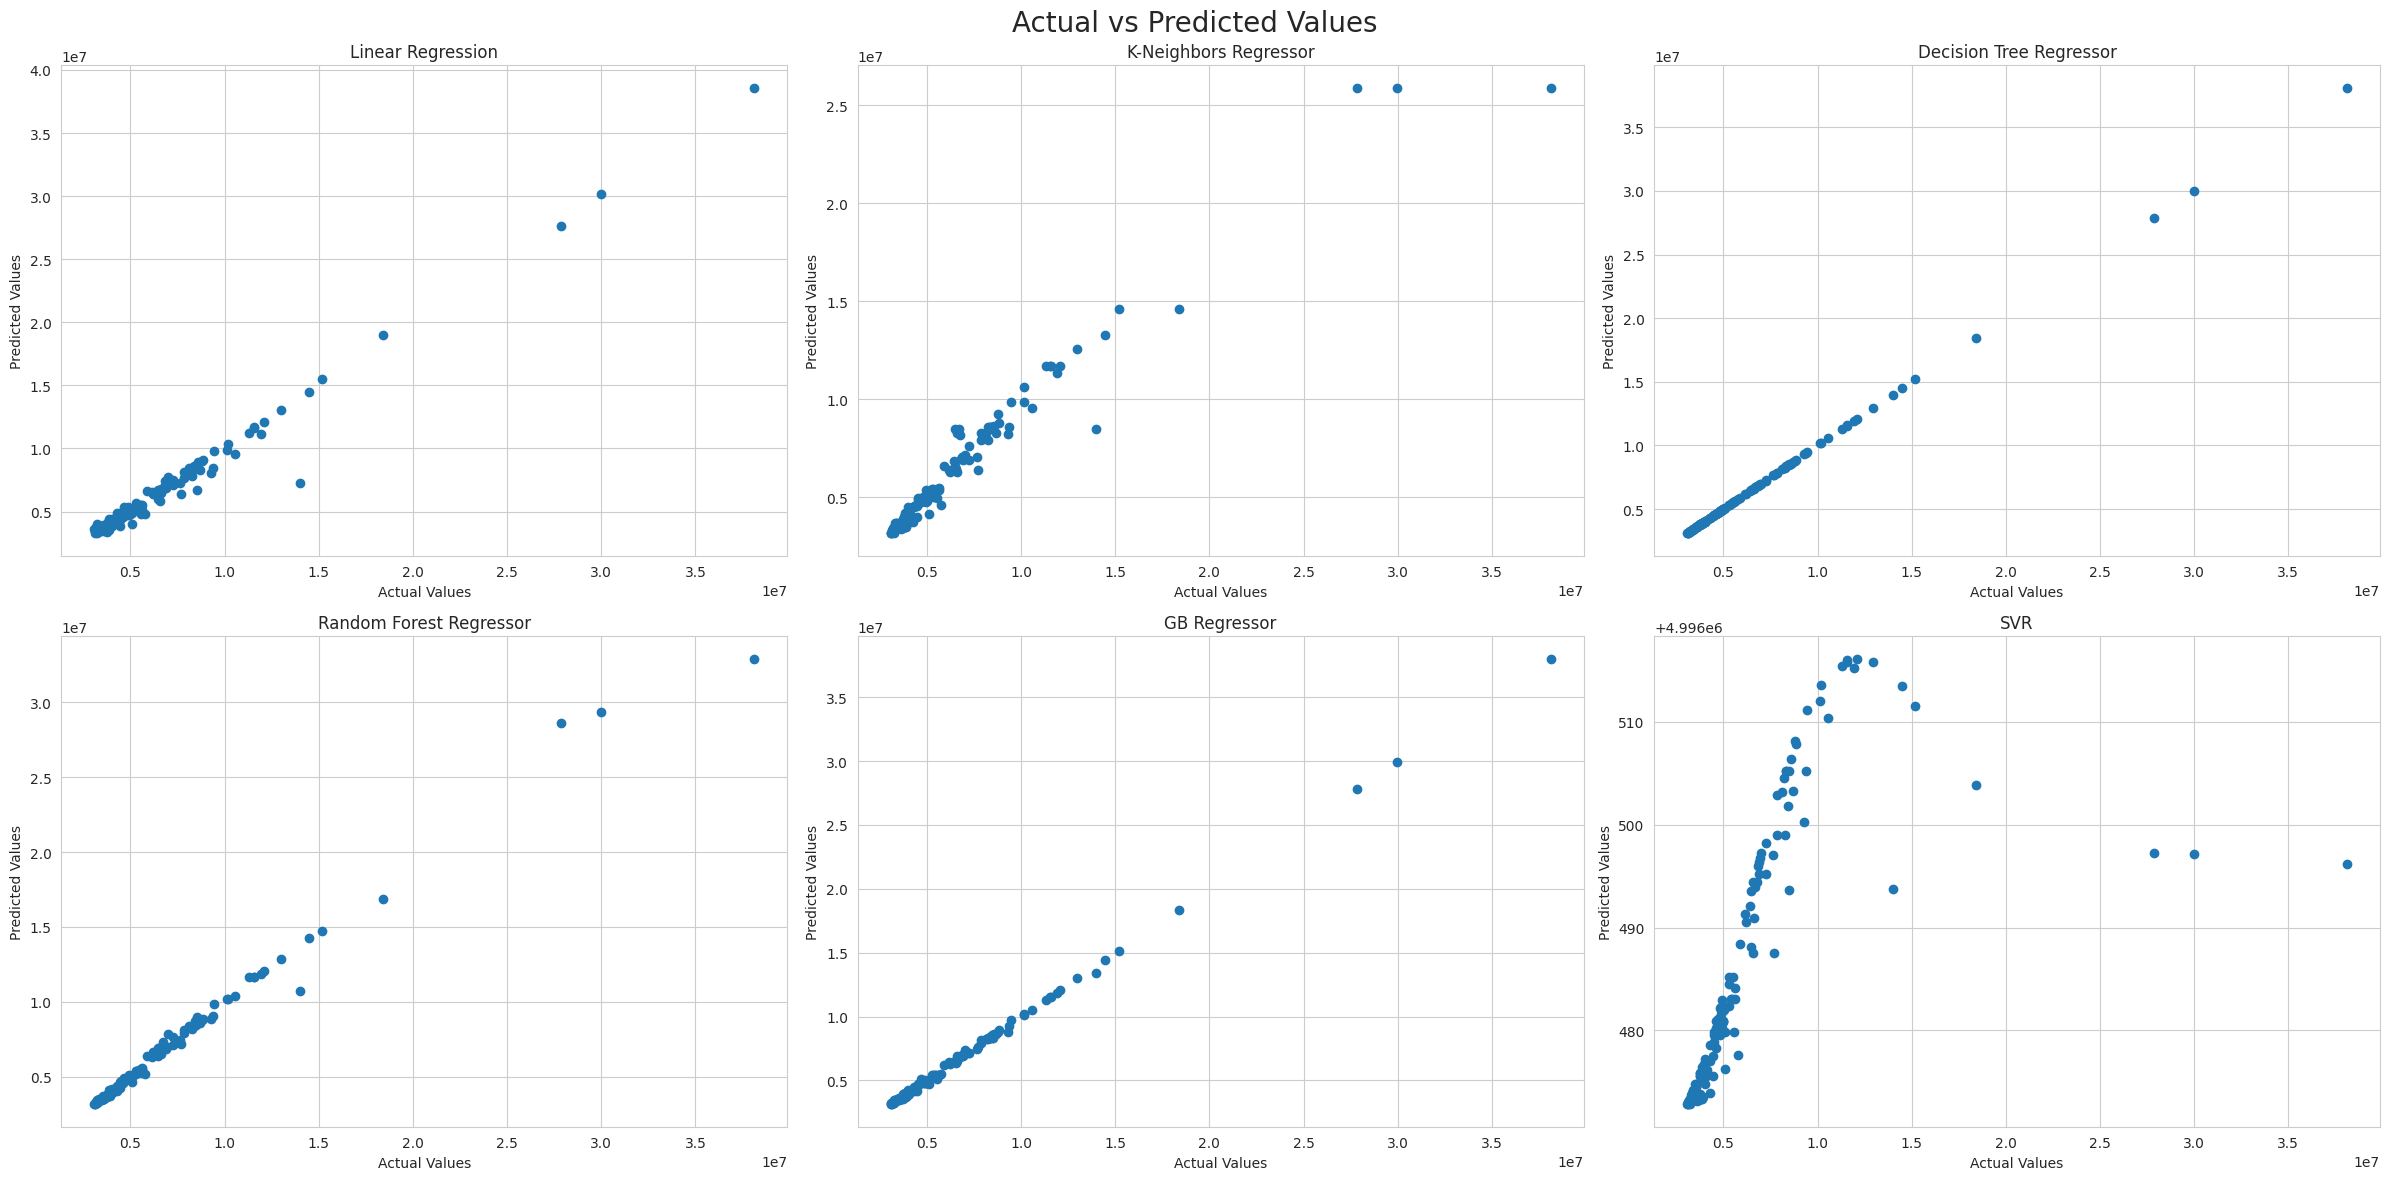

In [ ]:
# Make comparison for the actual values in training set of each models using scatter plot

# Define your classification models
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "GB Regressor": GradientBoostingRegressor(),
    "SVR": SVR()
}

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))
fig.suptitle('Actual vs Predicted Values', fontsize=20)

# Iterate through the models and train/evaluate them
for (model_name, model), ax in zip(models.items(), axes.flatten()):
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # print(model_name)
    y_predict = model.predict(x_train)
    ax.scatter(y_train, y_predict)
    ax.set_title(model_name)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()